# Imports

In [2]:
import numpy as np
import pandas as pd
import os
import gzip #&/or tarfile if needed to

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


# The data
We use the New York City listings.csv.gz (March 2022) from: http://insideairbnb.com/get-the-data

In [3]:
airbnb = pd.read_csv("./datasets/airbnb/listings.csv",low_memory=False)
#display(airbnb)
airbnb.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20220305031505,2022-03-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.32
1,5121,https://www.airbnb.com/rooms/5121,20220305031505,2022-03-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.32
2,5136,https://www.airbnb.com/rooms/5136,20220305031505,2022-03-05,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.02


In [4]:
# Get main info of the dataset quickly
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37631 entries, 0 to 37630
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37631 non-null  int64  
 1   listing_url                                   37631 non-null  object 
 2   scrape_id                                     37631 non-null  int64  
 3   last_scraped                                  37631 non-null  object 
 4   name                                          37617 non-null  object 
 5   description                                   36624 non-null  object 
 6   neighborhood_overview                         22408 non-null  object 
 7   picture_url                                   37631 non-null  object 
 8   host_id                                       37631 non-null  int64  
 9   host_url                                      37631 non-null 

In [5]:
#Results for a single column
airbnb["neighbourhood"]

0                New York, United States
1                                    NaN
2                                    NaN
3                New York, United States
4                New York, United States
                      ...               
37626    Queens, New York, United States
37627                                NaN
37628                                NaN
37629            New York, United States
37630            New York, United States
Name: neighbourhood, Length: 37631, dtype: object

In [6]:
# Results for multiple columns. Notice the double brackets because we input a list of columns.
hosts = airbnb[['host_id', 'host_name']]
hosts.head()

,host_id,host_name
0,2845,Jennifer
1,7356,Garon
2,7378,Rebecca
3,8967,Shunichi
4,7490,MaryEllen


In [7]:
#Select columns that are of a specific dtype:
object_attrib = airbnb.select_dtypes(include=['object'])
object_attrib.columns # to print the list of attributes that are of dtype = object
numerical_attrib = airbnb.select_dtypes(include=['int64', 'float64'])
numerical_attrib.columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_pe

# Initial data analysis 
### Questions to answer:
Our goals in this case study will be to understand some of the differences between each type of listing in our data, defined by the room_type column. Specifically, we would like to know: 
* What is the typical price for a listing? 
* What is the difference in median price for different types of listings? 
* How have these prices changed over time for each listing type? 
* What is the distribution of typical listing prices?

## Data cleaning

In [8]:
# Drop columns with 0 or very few non-null entries
to_drop= ["calendar_updated","bathrooms", "license"]
airbnb_droped = airbnb.drop(to_drop, axis=1)

#airbnb_droped.info(3) #Check we've droped correctly


In [9]:
# Continue with changing dytpe of date-columns to dtype= date-time
airbnb_droped['last_review']= pd.to_datetime(airbnb_droped['last_review'])
airbnb_droped['last_review'].head()


0   2019-11-04
1   2019-12-02
2   2021-08-08
3   2022-02-18
4   2017-07-21
Name: last_review, dtype: datetime64[ns]

In [10]:
# We can extract the year from the the "last_review" column like this
airbnb_droped['year'] = airbnb_droped['last_review'].dt.year
airbnb_droped['year'].head()

0    2019.0
1    2019.0
2    2021.0
3    2022.0
4    2017.0
Name: year, dtype: float64

In [11]:
#Calculate new outputs using columns directly
airbnb_droped["price"] = airbnb_droped["price"].replace('[\$,]', '', regex=True).astype(float)
airbnb_droped["min_revenue"] = airbnb_droped["minimum_nights"] * airbnb_droped["price"]
airbnb_droped[["minimum_nights", "price", "min_revenue"]].head(5)

,minimum_nights,price,min_revenue
0,30,150.0,4500.0
1,30,60.0,1800.0
2,5,275.0,1375.0
3,2,68.0,136.0
4,2,75.0,150.0


## Initial statistics

In [12]:
mean = airbnb_droped["price"].mean()
print("Mean listing price = ", mean)

Mean listing price =  166.22468177832107


In [13]:
median = airbnb_droped["price"].median()
print("Median listing price = ", median)

Median listing price =  112.0


This significant difference in mean and median suggests the distribution in price is heavily skewed. We should rely more on median prices for our analysis to get a sense of typical listings. So here we answered the first question "the typical price of a listing" is given by the median.

In [14]:
# get the mean grouped by type of room
airbnb_droped[["room_type", "price"]].groupby('room_type', as_index=False).mean()

,room_type,price
0,Entire home/apt,216.920342
1,Hotel room,274.813131
2,Private room,103.087636
3,Shared room,145.201401


In [15]:
# get the median grouped by type of room
airbnb_droped[["room_type", "price"]].groupby('room_type', as_index=False).median()

,room_type,price
0,Entire home/apt,156.0
1,Hotel room,200.0
2,Private room,66.0
3,Shared room,50.0


In [16]:
# get the median grouped by type of room and year
group = airbnb_droped[['room_type', 'year', 'price']].groupby(['room_type', 'year'], as_index=False).median()

# we create a separate subset for each category
c0 = group.loc[group['room_type'] == "Entire home/apt"]
c1 = group.loc[group['room_type'] == "Hotel room"]
c2 = group.loc[group['room_type'] == "Private room"]
c3 = group.loc[group['room_type'] == "Shared room"]


In [17]:
print(c3)

      room_type    year   price
30  Shared room  2013.0  1025.0
31  Shared room  2015.0    60.0
32  Shared room  2016.0    99.0
33  Shared room  2017.0    61.0
34  Shared room  2018.0    54.0
35  Shared room  2019.0    66.5
36  Shared room  2020.0    55.0
37  Shared room  2021.0    50.0
38  Shared room  2022.0    35.0


In [18]:
# We notice there's an outlier in the "Shared room" data for the year 2013
# We eliminate it to better visualize the time evolution of mean prices for the different categories
c3 = c3.drop(c3.index[0])
print (c3)

      room_type    year  price
31  Shared room  2015.0   60.0
32  Shared room  2016.0   99.0
33  Shared room  2017.0   61.0
34  Shared room  2018.0   54.0
35  Shared room  2019.0   66.5
36  Shared room  2020.0   55.0
37  Shared room  2021.0   50.0
38  Shared room  2022.0   35.0


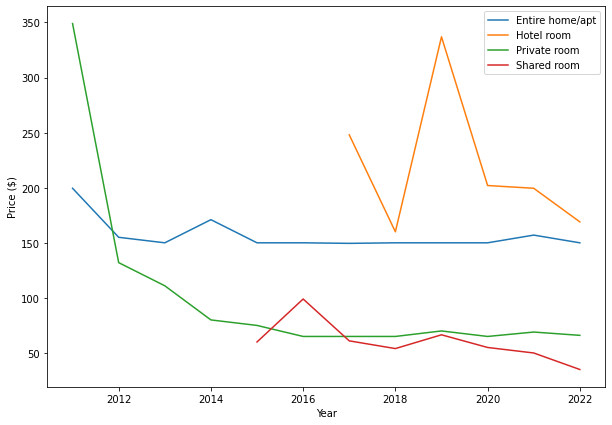

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
ax.plot(c0.year, c0.price, label = "Entire home/apt")
ax.plot(c1.year, c1.price, label = "Hotel room")
ax.plot(c2.year, c2.price, label = "Private room")
ax.plot(c3.year, c3.price, label = "Shared room")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Year")
ax.legend()
plt.show()


The above plot answers how have these prices changed over time for each listing type.

### How to filter data

In [20]:
# get all rows with price < 1000
airbnb_under_1000 = airbnb_droped[airbnb_droped["price"] < 1000]
airbnb_under_1000["price"].head()

# get all rows with price < 1000 and year equal to 2020
airbnb_under_1000_2020 = airbnb_droped[(airbnb_droped["price"] <1000) & (airbnb_droped["year"] == 2020)]
airbnb_under_1000_2020[["price", "year"]]

,price,year
15,55.0,2020.0
26,99.0,2020.0
30,80.0,2020.0
32,206.0,2020.0
39,220.0,2020.0
...,...,...
26493,55.0,2020.0
26522,182.0,2020.0
26592,35.0,2020.0
26640,110.0,2020.0


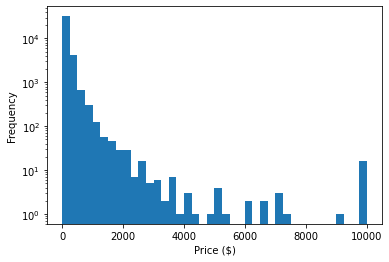

In [21]:
#ax = airbnb_under_1000_2020['price'].plot.hist(bins=40)
ax = airbnb_droped['price'].plot.hist(bins=40)
ax.set_xlabel("Price ($)")
ax.set_yscale("log")

The above plot shows the distribution of all listing prices regardless of the year. 
It is informative but it is not the distribution of "typical" listing prices. That should be the distribution of median prices, where the median is obtained for each year or for each category of listing.

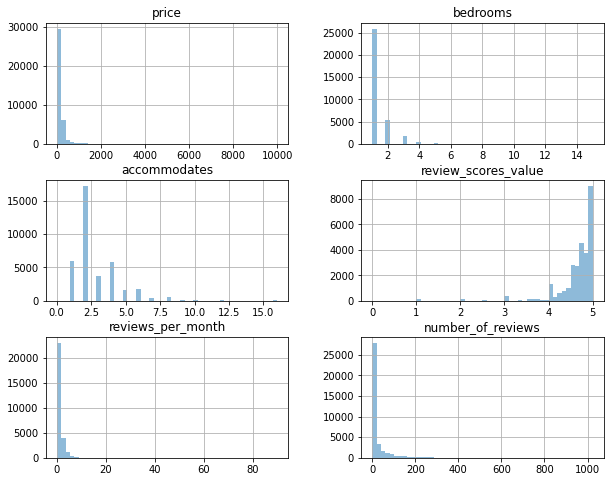

In [27]:
#ax = airbnb_droped[["price", "bedrooms", "accommodates", "review_scores_value", 
#                    "reviews_per_month", "number_of_reviews"]].plot.hist(bins=50, figsize = (10,5), alpha= 0.5)
#ax.set_yscale("log")
#plt.show()

ax = airbnb_droped[["price", "bedrooms", "accommodates", "review_scores_value", 
                    "reviews_per_month", "number_of_reviews"]].hist(bins=50, figsize = (10,8), alpha= 0.5)
plt.show()

The first plot is not really necessary or informative --that's why it's commented out--, it was just me trying to code how to visualize all histograms together in a different way.

 ### Take care of NA values

In [22]:
# For instance "bedrooms" attribute has some missing values so,
# we are gonna fill them with the median or just discard the rows

#airbnb_droped.dropna(subset=["bedrooms"])    # Get rid of the rows(districts) that have missing value
#airbnb_droped.drop("bedrooms", axis=1)       # Get rid of the whole attribute
median = airbnb_droped["bedrooms"].median()  # Set the (na) to some value, ie. zero, mean, median, mode...
airbnb_droped["bedrooms"].fillna(median, inplace= True)

airbnb_droped["bedrooms"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 37631 entries, 0 to 37630
Series name: bedrooms
Non-Null Count  Dtype  
--------------  -----  
37631 non-null  float64
dtypes: float64(1)
memory usage: 294.1 KB


# TO BE CONTINUED